**Data Science and Business Analytics Internship
At Sparks Foundation**

**Task 1 :** Predict the percentage of the students based on the number of study hours.

*Submitted by* : *Anjali Mehra*

*Importing Files*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

*Reading* *Data*

In [3]:
data = pd.read_csv("http://bit.ly/w-data")
print("Number of rows and columns")
print(data.shape)
print("Given Dataset :")
data.head()

Number of rows and columns
(25, 2)
Given Dataset :


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().any()    #checking for null values

Hours     False
Scores    False
dtype: bool

Which means, this dataset doesnot contain any null values

*Data* *Visualization*

Collecing and ploting the data 2D points on graph to check if there is any kind of relationship between them.

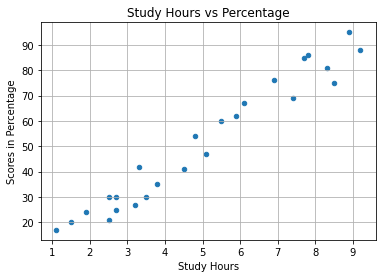

In [9]:
data.plot(x='Hours',y='Scores',kind='scatter',xlabel="Study Hours",ylabel="Scores in Percentage")
plt.title("Study Hours vs Percentage")
plt.grid(True)
plt.show()

 We can speculate that there is a +ve linear relationship between both the variables.

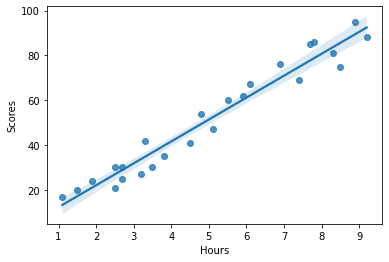

In [10]:
sns.regplot(x="Hours",y="Scores",data=data)

In [11]:
# Data Cleaning 
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [12]:
data.mean()

Hours      5.012
Scores    51.480
dtype: float64

*Preparing Data*

Dividing the Dataset into attributes and labels.

In [15]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

In [21]:
#Splitting the data into Training and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) # Defining Data

*Training the Algorithm*

Checking the values for test data by train the dataset using linear regression algorithm

In [22]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
# Plotting the regression line
line= lr.coef_*X+lr.intercept_  # y = mx + c

Text(0, 0.5, 'Scores')

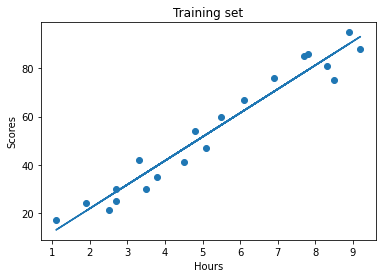

In [24]:
#Visualizing the Training Dataset
plt.scatter(x_train,y_train)
plt.title('Training set')
plt.plot(x_train,lr.predict(x_train))
plt.xlabel('Hours')
plt.ylabel('Scores')

*Predicting values*

In [26]:
#Predicting the scores
y_predict =lr.predict(x_test)
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Comparing predicted Scores with actual Scores

In [27]:
data = pd.DataFrame({"Actual Scores":y_test,"Predicted Scores":y_predict})
data

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [28]:
#Checking Accuracy
accuracy = lr.score(x_test, y_test)   
print("Accuracy:", accuracy*100)

Accuracy: 94.54906892105353


Question : What will be the predicted score if a student studies for 9.25 hours/day?

In [29]:
hours=[[9.25]]
pred = lr.predict(hours)
pred

array([93.69173249])

Therefore, if a student studies for 9.25 hours per day, the score will be 93.69 approximately.

*Model Evaluation*

Finally, Evaluating the performance of algorithm by calculating mean absolute error, which helps in evaluating different algorithm's performance on a particluar dataset.

In [30]:
from sklearn import metrics
MeanA= metrics.mean_absolute_error(y_test,y_predict)
print("Mean Absolute Error: ",MeanA)

Mean Absolute Error:  4.183859899002982


The lower the value the better is the model, therefore this model is a good working model.